# Stress Management Analysis

In [11]:
import pandas as pd

# Provide the path to your .xlsx file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"

# Read the .xlsx file
df = pd.read_excel(file_path)

# Display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 16384 entries, Timestamp to Column16362
dtypes: float64(16361), int64(4), object(19)
memory usage: 21.0+ MB


In [16]:
# Display the first few rows to confirm successful loading
df.head()

,Timestamp,Name,Age Group,Gender,Type of Accommodation,Year of Study,Feel overwhelmed by coursework,Pressure regarding exams/deadlines,Difficulty balancing academics and extracurriculars,Financial concerns contributing to stress,...,Column16353,Column16354,Column16355,Column16356,Column16357,Column16358,Column16359,Column16360,Column16361,Column16362
0,2024-02-10 00:00:00,Soni Sharma,Under 25,Female,Home / With Family,2nd Year,Rarely,3,Sometimes,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-10 00:00:00,Shubdeep Nayak,25 - 30,Male,Rented Apartment,2nd Year,Often,3,Always,Never,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-10 00:00:00,Kajal Mani Sharma,Under 25,Female,Home / With Family,1st Year,Sometimes,3,Sometimes,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-05-10 00:00:00,Vasu dev Sharma,Under 25,Male,Home / With Family,2nd Year,Sometimes,5,Sometimes,Ocassionally,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-10 00:00:00,Rahul sharma,25 - 30,Male,Home / With Family,Other,Sometimes,1,Sometimes,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Remove columns that are entirely empty
data_cleaned = df.dropna(how='all', axis=1)

# Display the cleaned dataset's structure
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Timestamp                                            168 non-null    object
 1   Name                                                 168 non-null    object
 2   Age Group                                            168 non-null    object
 3   Gender                                               168 non-null    object
 4   Type of Accommodation                                168 non-null    object
 5   Year of Study                                        168 non-null    object
 6   Feel overwhelmed by coursework                       168 non-null    object
 7   Pressure regarding exams/deadlines                   168 non-null    int64 
 8   Difficulty balancing academics and extracurriculars  168 non-null    object
 9  

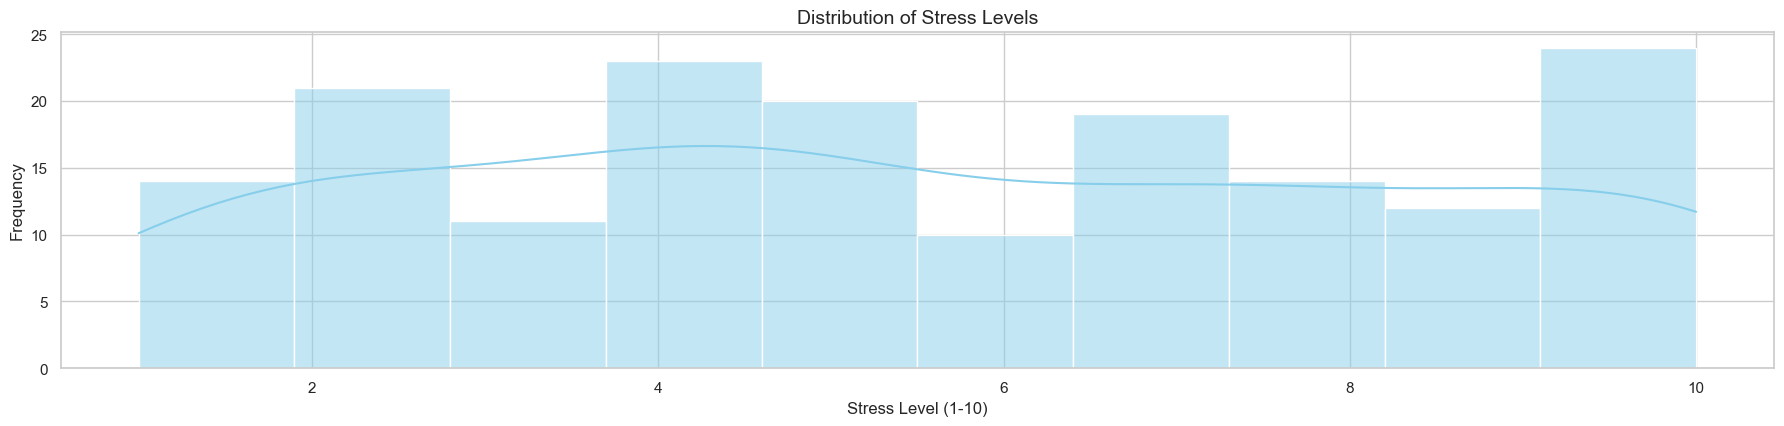

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

# Figure size configuration
plt.figure(figsize=(18, 12))

# 1. Distribution of Stress Levels
plt.subplot(3, 1, 1)
sns.histplot(data_cleaned['Current stress level (1-10)'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Stress Levels", fontsize=14)
plt.xlabel("Stress Level (1-10)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Adjust layout
plt.tight_layout()
plt.show()


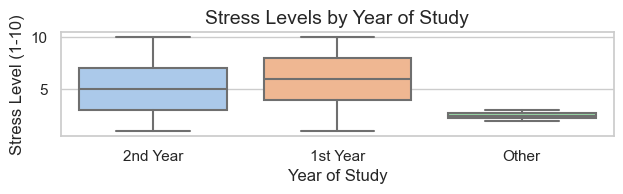

In [23]:
# 2. Correlation Between Study Year and Perceived Stress
plt.subplot(3, 1, 2)
sns.boxplot(data=data_cleaned, x='Year of Study', y='Current stress level (1-10)', palette='pastel')
plt.title("Stress Levels by Year of Study", fontsize=14)
plt.xlabel("Year of Study", fontsize=12)
plt.ylabel("Stress Level (1-10)", fontsize=12)
# Adjust layout
plt.tight_layout()
plt.show()

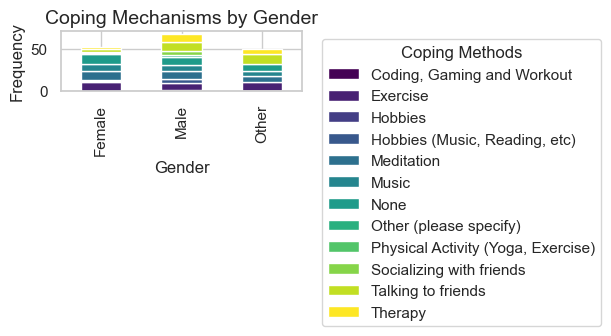

In [25]:
# 3. Gender-Based Analysis of Coping Mechanisms
plt.subplot(3, 1, 3)
coping_gender = data_cleaned.groupby(['Gender', 'Coping methods']).size().unstack(fill_value=0)
coping_gender.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("Coping Mechanisms by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Coping Methods", bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust layout
plt.tight_layout()
plt.show()

# Visulisation of the key factors contributing to stress measurement:-

#### 1. Correlation Heatmap: To display the relationships between "Current stress level (1-10)" and other influencing factors
#### 2. Bar Chart: To show the average stress level grouped by categorical factors such as "Difficulty balancing academics and        extracurriculars" or "Changes in sleep patterns due to stress"
#### 3. Box Plot: To visualize how "Pressure regarding exams/deadlines" correlates with stress levels

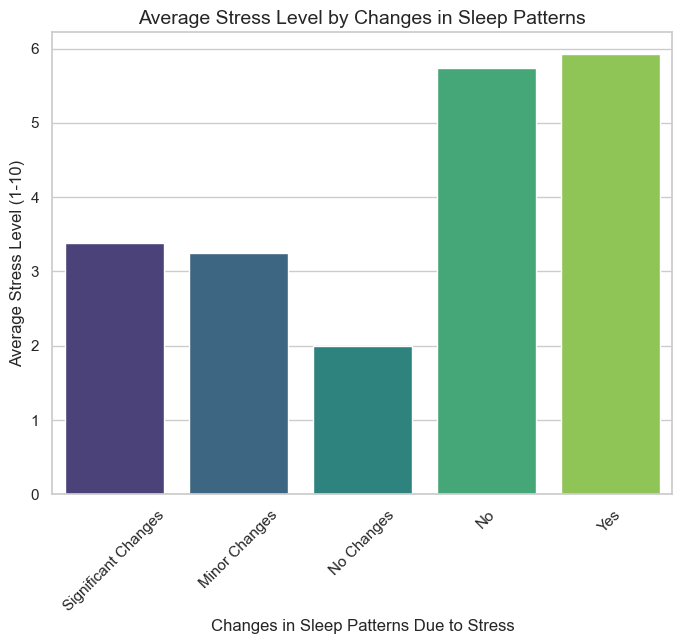

In [28]:
# Bar chart: Average stress level grouped by sleep pattern changes
plt.figure(figsize=(8, 6))
sns.barplot(
    data=data_cleaned,
    x="Changes in sleep patterns due to stress",
    y="Current stress level (1-10)",
    ci=None,
    palette="viridis",
)
plt.title("Average Stress Level by Changes in Sleep Patterns", fontsize=14)
plt.xlabel("Changes in Sleep Patterns Due to Stress", fontsize=12)
plt.ylabel("Average Stress Level (1-10)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

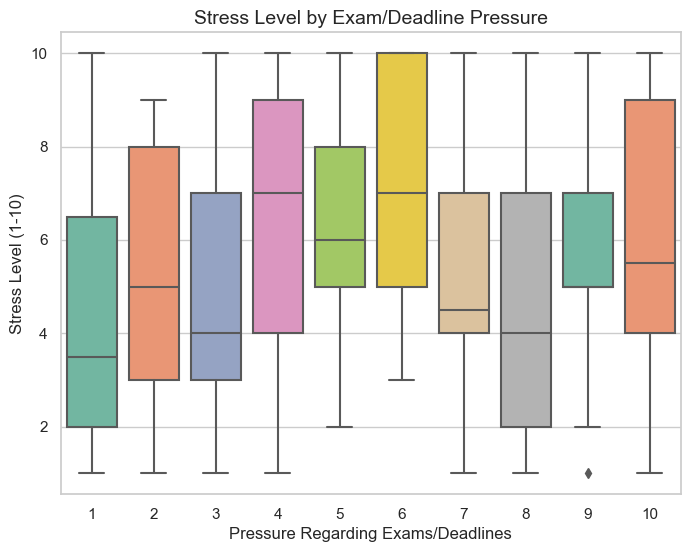

In [29]:
# Box plot: Stress level by pressure regarding exams/deadlines
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=data_cleaned,
    x="Pressure regarding exams/deadlines",
    y="Current stress level (1-10)",
    palette="Set2",
)
plt.title("Stress Level by Exam/Deadline Pressure", fontsize=14)
plt.xlabel("Pressure Regarding Exams/Deadlines", fontsize=12)
plt.ylabel("Stress Level (1-10)", fontsize=12)
plt.show()

In [31]:
# Compute correlation between stress level and other factors to identify top 5 contributors
# Encode necessary categorical columns for numerical analysis

encoded_data = data_cleaned.copy()
for column in [
    "Difficulty balancing academics and extracurriculars",
    "Financial concerns contributing to stress",
    "Feel physically/emotionally exhausted",
    "Changes in sleep patterns due to stress",
    "Unable to control important things in life",
]:
    encoded_data[column] = encoded_data[column].astype('category').cat.codes

# Select relevant columns
correlation_columns = [
    "Current stress level (1-10)",
    "Pressure regarding exams/deadlines",
    "Difficulty balancing academics and extracurriculars",
    "Financial concerns contributing to stress",
    "Feel physically/emotionally exhausted",
    "Changes in sleep patterns due to stress",
    "Unable to control important things in life",
]

# Calculate correlation matrix
correlation_matrix = encoded_data[correlation_columns].corr()

# Extract correlations with "Current stress level (1-10)"
stress_correlations = correlation_matrix["Current stress level (1-10)"].sort_values(ascending=False)

# Get the top 5 factors excluding self-correlation
top_5_factors = stress_correlations[1:6]  # Exclude "Current stress level (1-10)" itself
top_5_factors


Pressure regarding exams/deadlines                     0.104365
Difficulty balancing academics and extracurriculars    0.091416
Changes in sleep patterns due to stress                0.049105
Feel physically/emotionally exhausted                 -0.077919
Financial concerns contributing to stress             -0.080270
Name: Current stress level (1-10), dtype: float64

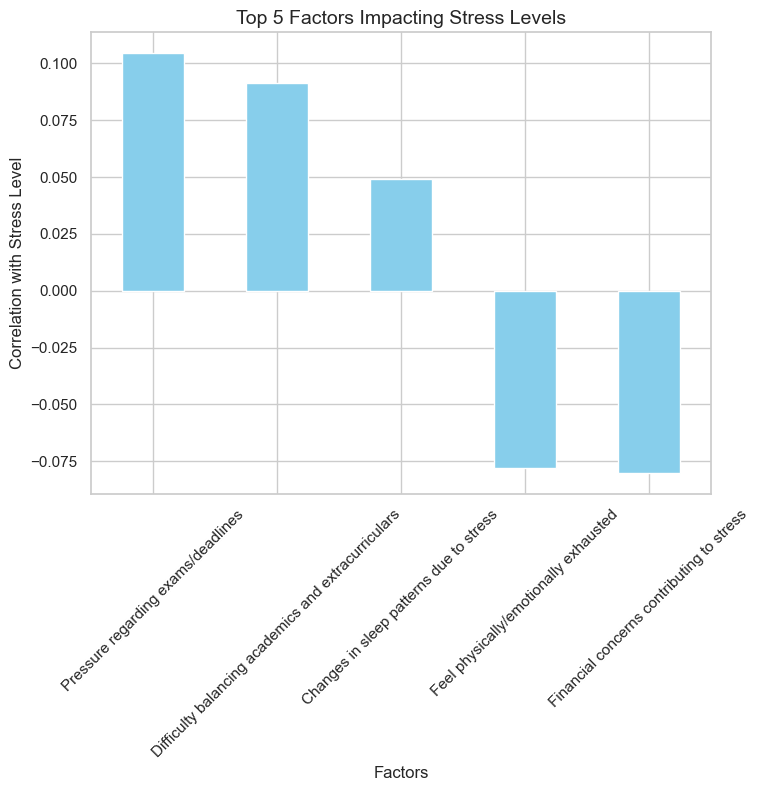

In [38]:
# Visualization: Bar Chart of Top 5 Correlations
plt.figure(figsize=(8, 6))
top_5_factors.plot(kind='bar', color='skyblue')
plt.title("Top 5 Factors Impacting Stress Levels", fontsize=14)
plt.xlabel("Factors", fontsize=12)
plt.ylabel("Correlation with Stress Level", fontsize=12)
plt.xticks(rotation=45)
plt.show()

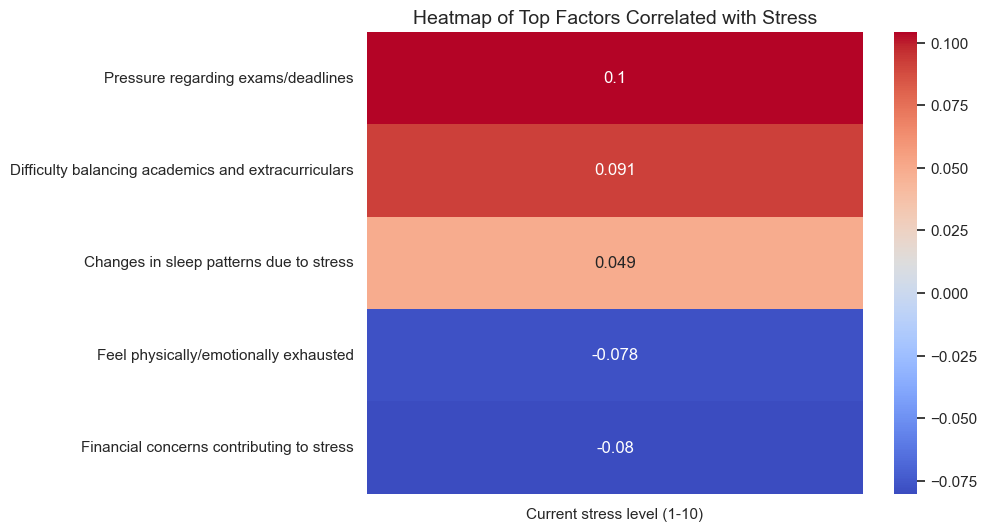

In [37]:
# Visualization: Heatmap of Top 5 Factors
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.loc[top_5_factors.index, ["Current stress level (1-10)"]],
            annot=True, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Top Factors Correlated with Stress", fontsize=14)
plt.show()

In [40]:
# Calculate correlation between symptoms and stress levels
symptom_columns = [
    "Feel physically/emotionally exhausted",
    "Changes in sleep patterns due to stress",
    "Feel lonely or isolated",
    "Difficulty balancing academics and extracurriculars",
    "Feel overwhelmed by coursework"
]

# Re-encode categorical columns for numerical analysis
encoded_data = data_cleaned.copy()
for column in symptom_columns:
    encoded_data[column] = encoded_data[column].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = encoded_data[symptom_columns + ["Current stress level (1-10)"]].corr()

# Display correlation values with "Current stress level (1-10)"
correlation_matrix["Current stress level (1-10)"].sort_values(ascending=False)


Current stress level (1-10)                            1.000000
Difficulty balancing academics and extracurriculars    0.091416
Changes in sleep patterns due to stress                0.049105
Feel lonely or isolated                                0.024368
Feel overwhelmed by coursework                        -0.075770
Feel physically/emotionally exhausted                 -0.077919
Name: Current stress level (1-10), dtype: float64

# Identify symptoms of anxiety and stress based on the dataset, we can look at the columns that describe behaviors, emotions, and physical signs associated with stress. These could include:

##### 1.Feel physically/emotionally exhausted: Emotional and physical fatigue is a common symptom of both anxiety and stress.
##### 2.Changes in sleep patterns due to stress: Disrupted sleep is often linked to anxiety and high stress levels.
##### 3.Feeling lonely or isolated: Social withdrawal or feeling disconnected is a symptom of stress and anxiety.
##### 4.Difficulty balancing responsibilities: Being overwhelmed by responsibilities, such as academics or personal life, is another indicator
##### 5.Inability to control important things in life: A sense of helplessness or loss of control is a significant symptom of stress and anxiety

In [52]:
# Select relevant columns for correlation analysis
stress_factors = [
    "Pressure regarding exams/deadlines",
    "Current stress level (1-10)",
    "Effectiveness of coping strategies",
    "Confidence in managing stress",
]

# Convert Likert scale values to numerical if applicable for correlation analysis
# Assuming the columns with Likert scale values (categorical data) are already encoded

# Correlation analysis
correlation_matrix = data_cleaned[stress_factors].corr()

# Symptoms analysis: Frequency counts of stress-related symptoms
symptoms_columns = [
    "Feel physically/emotionally exhausted",
    "Changes in sleep patterns due to stress",
    "Feel lonely or isolated",
    "Difficulty balancing academics and extracurriculars",
]

# Get frequency counts for each symptom
symptoms_summary = data_cleaned[symptoms_columns].apply(pd.Series.value_counts)

# Print out the correlation matrix and symptoms summary
print("Correlation Matrix between Stress Factors:")
print(correlation_matrix)

print("\nSymptoms Frequency Summary:")
print(symptoms_summary)


Correlation Matrix between Stress Factors:
                                    Pressure regarding exams/deadlines  \
Pressure regarding exams/deadlines                            1.000000   
Current stress level (1-10)                                   0.104365   
Effectiveness of coping strategies                            0.026347   
Confidence in managing stress                                 0.189028   

                                    Current stress level (1-10)  \
Pressure regarding exams/deadlines                     0.104365   
Current stress level (1-10)                            1.000000   
Effectiveness of coping strategies                     0.071358   
Confidence in managing stress                          0.095480   

                                    Effectiveness of coping strategies  \
Pressure regarding exams/deadlines                            0.026347   
Current stress level (1-10)                                   0.071358   
Effectiveness of coping stra

<Figure size 1000x600 with 0 Axes>

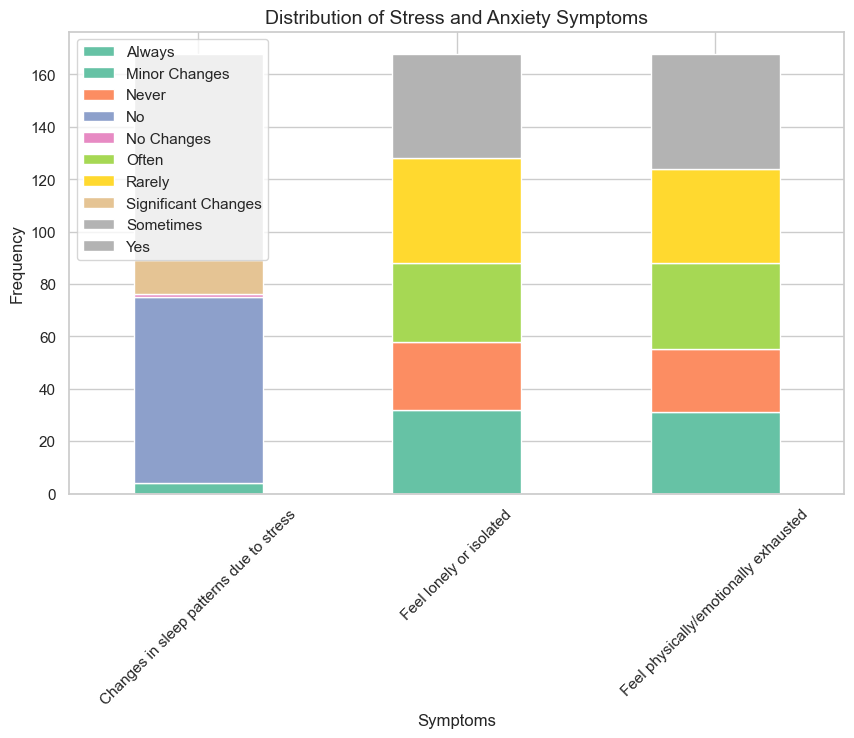

In [50]:
# Visualization: Stress and Anxiety Symptoms
# Bar Chart: Distribution of Symptoms (exhaustion, sleep changes, loneliness)
plt.figure(figsize=(10, 6))
symptoms_columns = [
    "Feel physically/emotionally exhausted",
    "Changes in sleep patterns due to stress",
    "Feel lonely or isolated"
]

# Plot the distribution of responses for each symptom
symptom_data = data_cleaned[symptoms_columns].apply(pd.Series.value_counts).T.sort_index()
symptom_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Set2")

plt.title("Distribution of Stress and Anxiety Symptoms", fontsize=14)
plt.xlabel("Symptoms", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()

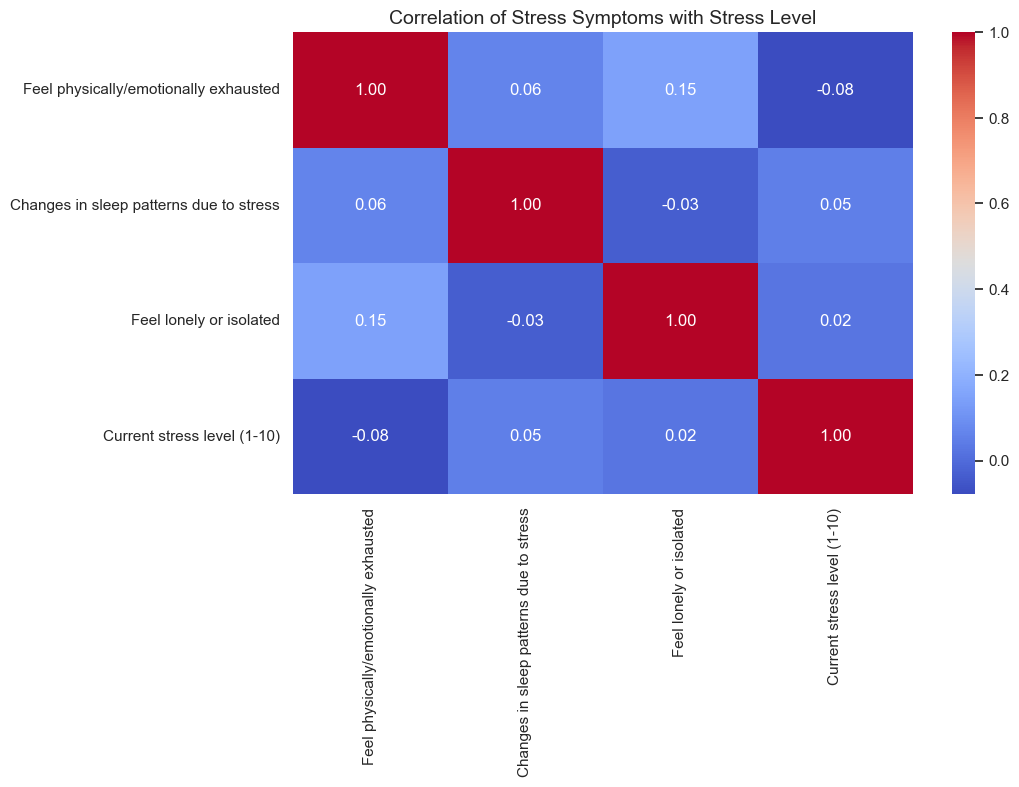

In [43]:
# Heatmap: Correlation of Symptoms with Stress Level
plt.figure(figsize=(10, 6))
correlation_matrix_symptoms = encoded_data[
    symptoms_columns + ["Current stress level (1-10)"]
].corr()

# Plot heatmap for correlation with stress level
sns.heatmap(correlation_matrix_symptoms, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Correlation of Stress Symptoms with Stress Level", fontsize=14)
plt.show()


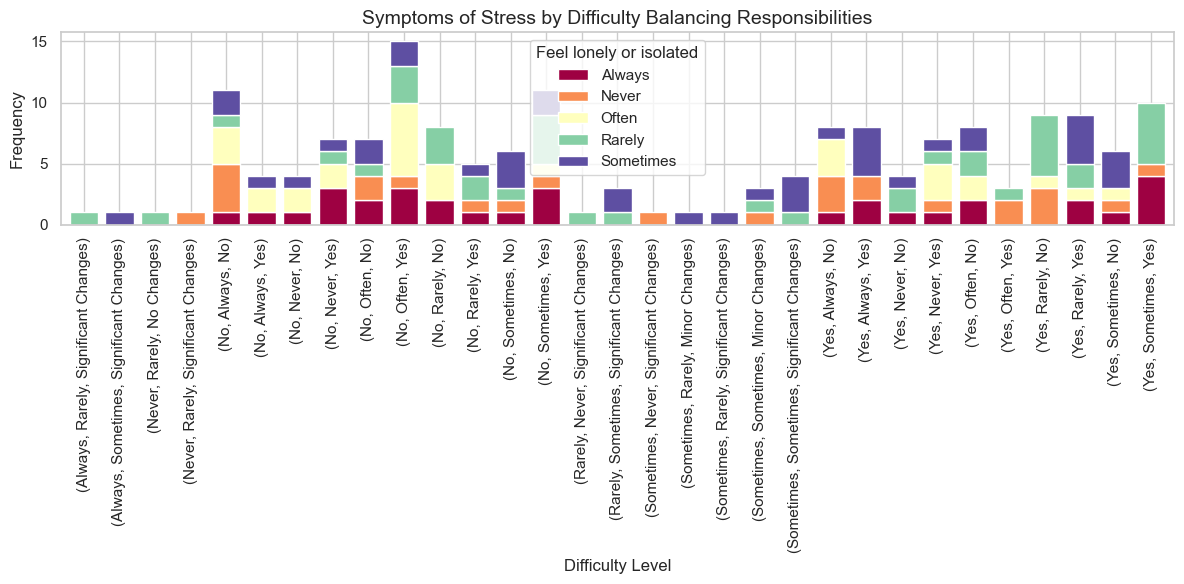

In [44]:
# Stacked Bar Chart: Symptoms vs Difficulty in Balancing Responsibilities
difficulty_symptoms = data_cleaned.groupby(
    ["Difficulty balancing academics and extracurriculars"] + symptoms_columns
).size().unstack(fill_value=0)

difficulty_symptoms.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="Spectral",
    width=0.8
)
plt.title("Symptoms of Stress by Difficulty Balancing Responsibilities", fontsize=14)
plt.xlabel("Difficulty Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 16384 entries, Timestamp to Column16362
dtypes: float64(16361), int64(4), object(19)
memory usage: 21.0+ MB


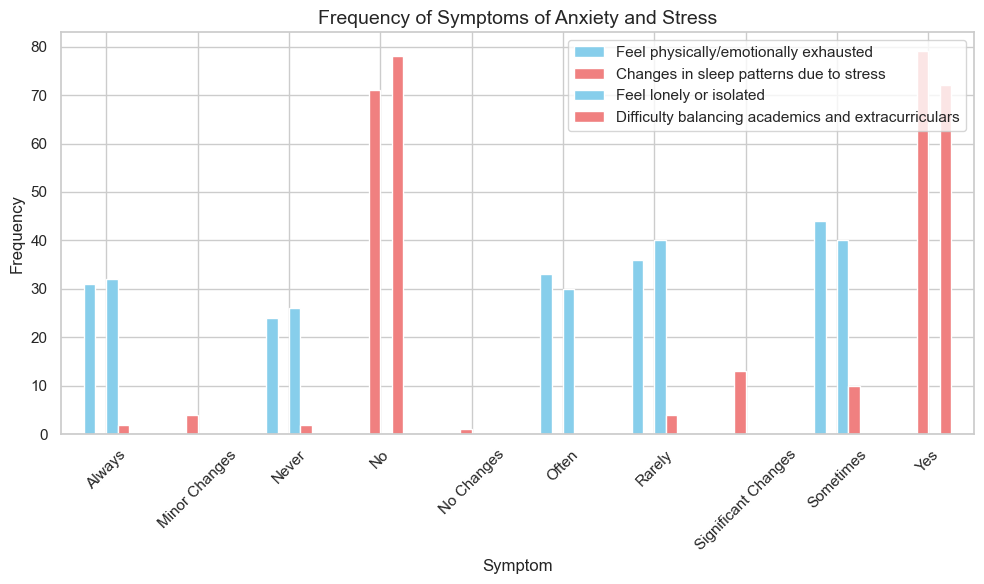

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Provide the path to your .xlsx file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"

# Read the .xlsx file
df = pd.read_excel(file_path)

# Display information about the data
df.info()
# Symptoms columns to analyze
symptoms_columns = [
    "Feel physically/emotionally exhausted",
    "Changes in sleep patterns due to stress",
    "Feel lonely or isolated",
    "Difficulty balancing academics and extracurriculars",
]

# Generate frequency counts for each symptom
symptom_counts = data_cleaned[symptoms_columns].apply(pd.Series.value_counts)

# Plot a bar chart for symptom frequencies
symptom_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Frequency of Symptoms of Anxiety and Stress', fontsize=14)
plt.xlabel('Symptom', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion on Symptoms of Anxiety and Stress:
#### The dataset identifies key anxiety and stress symptoms:-
    1.Emotional exhaustion
    2.Sleep disturbances
    3.Isolation
    4.Difficulty balancing responsibilities
These symptoms significantly impact mental well-being
Effective coping strategies and stress management can help alleviate these issues
Focusing on emotional exhaustion and sleep disruption is crucial for reducing overall stress

In [62]:
# Additional analysis based on the dataset

# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data has been cleaned and is ready for analysis
df = pd.read_excel(r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx")

# Let's display the first few rows to understand its structure
df.head()

# 1. Coping Mechanisms Analysis: Analyzing the effectiveness of coping strategies
# Assuming columns related to coping mechanisms are present (e.g., "Coping strategy", "Effectiveness")
coping_columns = ["Coping strategy", "Effectiveness of coping strategies"]

# Clean missing values and categorize effectiveness
df[coping_columns] = df[coping_columns].fillna("Unknown")
coping_effectiveness = df["Effectiveness of coping strategies"].value_counts()

# Plot the distribution of coping strategy effectiveness
plt.figure(figsize=(8, 6))
sns.barplot(x=coping_effectiveness.index, y=coping_effectiveness.values, palette="viridis")
plt.title("Effectiveness of Coping Strategies", fontsize=14)
plt.xlabel("Effectiveness Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Demographic Influence on Stress: Analyzing the influence of 'Gender' and 'Year of Study' on stress
# Assuming columns like "Gender" and "Year of Study" are present
gender_stress_corr = df.groupby("Gender")["Current stress level (1-10)"].mean()
year_stress_corr = df.groupby("Year of Study")["Current stress level (1-10)"].mean()

# Plot gender-based stress level comparison
plt.figure(figsize=(8, 6))
gender_stress_corr.plot(kind="bar", color="skyblue")
plt.title("Average Stress Level by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Stress Level", fontsize=12)
plt.tight_layout()
plt.show()

# Plot year-based stress level comparison
plt.figure(figsize=(8, 6))
year_stress_corr.plot(kind="bar", color="salmon")
plt.title("Average Stress Level by Year of Study", fontsize=14)
plt.xlabel("Year of Study", fontsize=12)
plt.ylabel("Average Stress Level", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Correlation between Academic Pressure and Stress: Examining the relationship between exam pressure and stress
exam_pressure_stress_corr = df[["Pressure regarding exams/deadlines", "Current stress level (1-10)"]].corr()
exam_pressure_stress_corr

# Plot the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Pressure regarding exams/deadlines", y="Current stress level (1-10)", color="green")
plt.title("Pressure Regarding Exams/Deadlines vs Stress Level", fontsize=14)
plt.xlabel("Pressure regarding exams/deadlines", fontsize=12)
plt.ylabel("Current Stress Level", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Impact of Extracurricular Activities on Stress: Analyzing the role of extracurricular activities on stress
# Assuming column "Involvement in extracurricular activities" exists
extracurricular_stress_corr = df.groupby("Involvement in extracurricular activities")["Current stress level (1-10)"].mean()

# Plot the impact of extracurricular activities on stress level
plt.figure(figsize=(8, 6))
extracurricular_stress_corr.plot(kind="bar", color="lightcoral")
plt.title("Impact of Extracurricular Activities on Stress Level", fontsize=14)
plt.xlabel("Extracurricular Activity Involvement", fontsize=12)
plt.ylabel("Average Stress Level", fontsize=12)
plt.tight_layout()
plt.show()

# 5. Long-Term Stress Trends: Analyzing stress levels over time (if time or year is available)
# Assuming a "Year" or "Time" column exists for trend analysis
if "Year" in df.columns:
    year_stress_trend = df.groupby("Year")["Current stress level (1-10)"].mean()

    # Plot the trend over years
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=year_stress_trend.index, y=year_stress_trend.values, marker="o", color="purple")
    plt.title("Long-Term Stress Trends Over the Years", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Average Stress Level", fontsize=12)
    plt.tight_layout()
    plt.show()

# Display the correlation results for academic pressure and stress
exam_pressure_stress_corr


KeyError: "['Coping strategy'] not in index"

In [63]:
# Display the column names to verify available data
print(df.columns)


Index(['Timestamp', 'Name', 'Age Group', 'Gender', 'Type of Accommodation',
       'Year of Study', 'Feel overwhelmed by coursework',
       'Pressure regarding exams/deadlines',
       'Difficulty balancing academics and extracurriculars',
       'Financial concerns contributing to stress',
       ...
       'Column16353', 'Column16354', 'Column16355', 'Column16356',
       'Column16357', 'Column16358', 'Column16359', 'Column16360',
       'Column16361', 'Column16362'],
      dtype='object', length=16384)


In [1]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"
data = pd.ExcelFile(file_path)

# Display sheet names to find the relevant sheet for analysis
print("Sheet Names:", data.sheet_names)

# Load a specific sheet to inspect its content
df = data.parse(data.sheet_names[0])  # Replace with the correct sheet name if needed
print(df.head())

# Convert age column to categorical age groups
# Ensure 'Age' column name matches your dataset's column name
df['Age Group'] = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 65, 75, 85], labels=['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85'])

# Analysis based on age group
age_group_analysis = df['Age Group'].value_counts()

# Qualification analysis
qualification_analysis = df['Qualification'].value_counts()

# Education level analysis
education_analysis = df['Education'].value_counts()

# Display the analyses
print("Age Group Analysis:\n", age_group_analysis)
print("\nQualification Analysis:\n", qualification_analysis)
print("\nEducation Level Analysis:\n", education_analysis)


Sheet Names: ['Sheet1']
             Timestamp               Name Age Group  Gender  \
0  2024-02-10 00:00:00        Soni Sharma  Under 25  Female   
1  2024-03-10 00:00:00     Shubdeep Nayak   25 - 30    Male   
2  2024-04-10 00:00:00  Kajal Mani Sharma  Under 25  Female   
3  2024-05-10 00:00:00    Vasu dev Sharma  Under 25    Male   
4  2024-06-10 00:00:00       Rahul sharma   25 - 30    Male   

  Type of Accommodation Year of Study Feel overwhelmed by coursework  \
0    Home / With Family      2nd Year                         Rarely   
1      Rented Apartment      2nd Year                          Often   
2    Home / With Family      1st Year                      Sometimes   
3    Home / With Family      2nd Year                      Sometimes   
4    Home / With Family         Other                      Sometimes   

   Pressure regarding exams/deadlines  \
0                                   3   
1                                   3   
2                                   3   


KeyError: 'Age'

In [2]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"
data = pd.ExcelFile(file_path)

# Load a specific sheet to inspect its content
df = data.parse(data.sheet_names[0])  # Replace with the correct sheet name if needed

# Display the column names to find the correct ones
print("Column Names:", df.columns)

# Display the first few rows to better understand the data
print(df.head())


Column Names: Index(['Timestamp', 'Name', 'Age Group', 'Gender', 'Type of Accommodation',
       'Year of Study', 'Feel overwhelmed by coursework',
       'Pressure regarding exams/deadlines',
       'Difficulty balancing academics and extracurriculars',
       'Financial concerns contributing to stress',
       ...
       'Column16353', 'Column16354', 'Column16355', 'Column16356',
       'Column16357', 'Column16358', 'Column16359', 'Column16360',
       'Column16361', 'Column16362'],
      dtype='object', length=16384)
             Timestamp               Name Age Group  Gender  \
0  2024-02-10 00:00:00        Soni Sharma  Under 25  Female   
1  2024-03-10 00:00:00     Shubdeep Nayak   25 - 30    Male   
2  2024-04-10 00:00:00  Kajal Mani Sharma  Under 25  Female   
3  2024-05-10 00:00:00    Vasu dev Sharma  Under 25    Male   
4  2024-06-10 00:00:00       Rahul sharma   25 - 30    Male   

  Type of Accommodation Year of Study Feel overwhelmed by coursework  \
0    Home / With Family

In [11]:
import pandas as pd

# Replace with the path to your Excel file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure
print(data.head())

# Get the distribution of the "Age Group" column
age_group_distribution = data['Age Group'].value_counts()

# Print the distribution
print(age_group_distribution)


             Timestamp               Name Age Group  Gender  \
0  2024-02-10 00:00:00        Soni Sharma  Under 25  Female   
1  2024-03-10 00:00:00     Shubdeep Nayak   25 - 30    Male   
2  2024-04-10 00:00:00  Kajal Mani Sharma  Under 25  Female   
3  2024-05-10 00:00:00    Vasu dev Sharma  Under 25    Male   
4  2024-06-10 00:00:00       Rahul sharma   25 - 30    Male   

  Type of Accommodation Year of Study Feel overwhelmed by coursework  \
0    Home / With Family      2nd Year                         Rarely   
1      Rented Apartment      2nd Year                          Often   
2    Home / With Family      1st Year                      Sometimes   
3    Home / With Family      2nd Year                      Sometimes   
4    Home / With Family         Other                      Sometimes   

   Pressure regarding exams/deadlines  \
0                                   3   
1                                   3   
2                                   3   
3                       

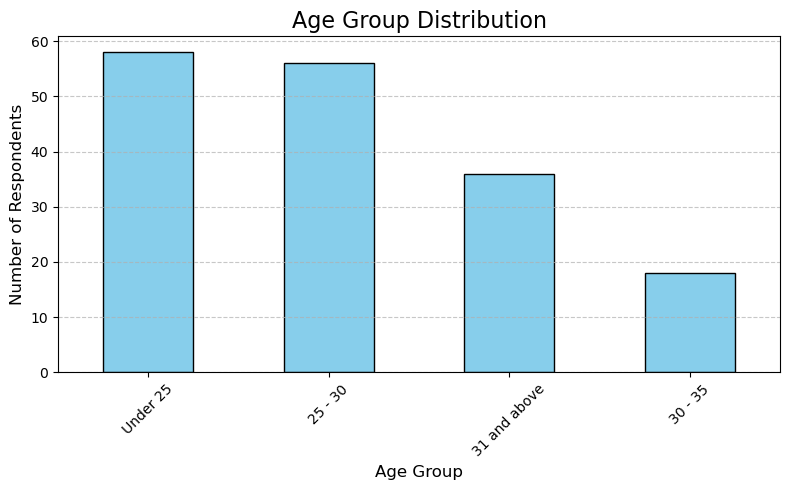

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the path to your Excel file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Get the distribution of the "Age Group" column
age_group_distribution = data['Age Group'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
age_group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Age Group Distribution', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


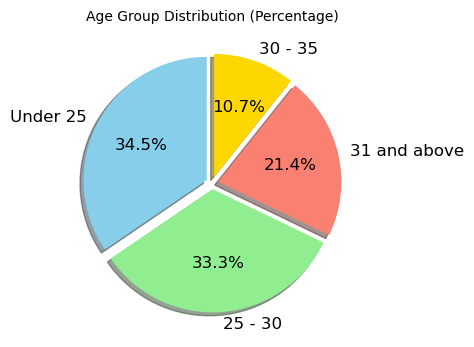

Percentage of Respondents by Age Group:
Under 25        34.5
25 - 30         33.3
31 and above    21.4
30 - 35         10.7
Name: Age Group, dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the path to your Excel file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Calculate the distribution and percentages
age_group_distribution = data['Age Group'].value_counts()
age_group_percentage = (age_group_distribution / age_group_distribution.sum()) * 100

# Plot the pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']  # Custom colors for different age groups
plt.figure(figsize=(4, 4))
age_group_distribution.plot.pie(
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    colors=colors,
    startangle=90,
    explode=[0.05] * len(age_group_distribution),  # Slightly explode each slice
    shadow=True,
    textprops={'fontsize': 12}
)

# Add title
plt.title('Age Group Distribution (Percentage)', fontsize=10)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.ylabel('')  # Hide the y-axis label
plt.show()

# Display the percentage breakdown
print("Percentage of Respondents by Age Group:")
print(age_group_percentage.round(1))


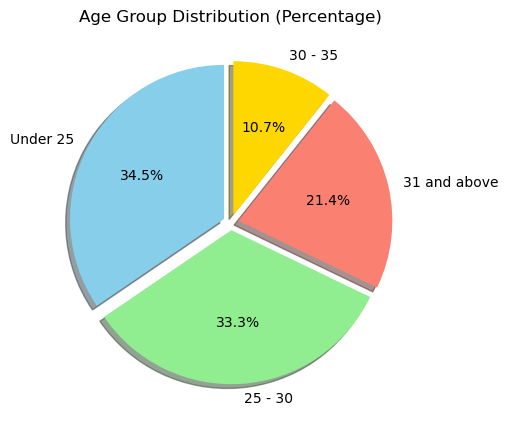

Percentage of Respondents by Age Group:
Under 25        34.5
25 - 30         33.3
31 and above    21.4
30 - 35         10.7
Name: Age Group, dtype: float64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the path to your Excel file
file_path = r"C:\Users\Rahul\Desktop\Capstone_Data_Collection.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Calculate the distribution and percentages
age_group_distribution = data['Age Group'].value_counts()
age_group_percentage = (age_group_distribution / age_group_distribution.sum()) * 100

# Plot the pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']  # Custom colors for different age groups
plt.figure(figsize=(5, 5))
age_group_distribution.plot.pie(
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    colors=colors,
    startangle=90,
    explode=[0.05] * len(age_group_distribution),  # Slightly explode each slice
    shadow=True,
    textprops={'fontsize': 10}  # Smaller font for labels
)

# Add title
plt.title('Age Group Distribution (Percentage)', fontsize=12)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.ylabel('')  # Hide the y-axis label
plt.show()

# Display the percentage breakdown
print("Percentage of Respondents by Age Group:")
print(age_group_percentage.round(1))


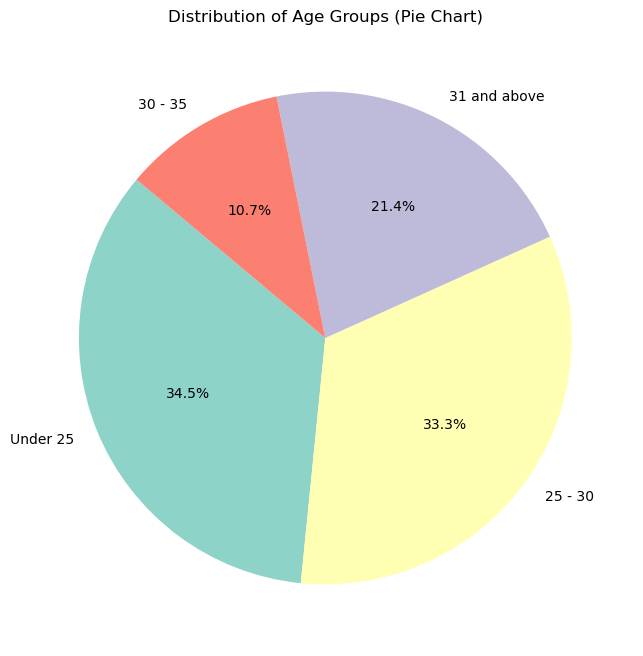

In [1]:
# Importing the necessary libraries to generate the pie chart
import matplotlib.pyplot as plt

# Data inferred from the chart
age_groups = ["Under 25", "25 - 30", "31 and above", "30 - 35"]
counts = [58, 56, 36, 18]

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=age_groups, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Distribution of Age Groups (Pie Chart)")
plt.show()


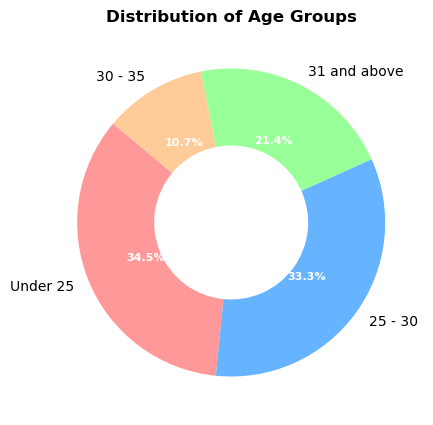

In [14]:
# Generating a donut chart with a more attractive color palette
import matplotlib.pyplot as plt

# Data inferred from the chart
age_groups = ["Under 25", "25 - 30", "31 and above", "30 - 35"]
counts = [58, 56, 36, 18]
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]  # Custom attractive colors

# Plot a donut chart
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    counts, 
    labels=age_groups, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.5)  # Creating the donut effect
)
plt.setp(autotexts, size=8, weight="bold", color="white")
plt.title("Distribution of Age Groups", fontsize=12, weight="bold")
plt.show()


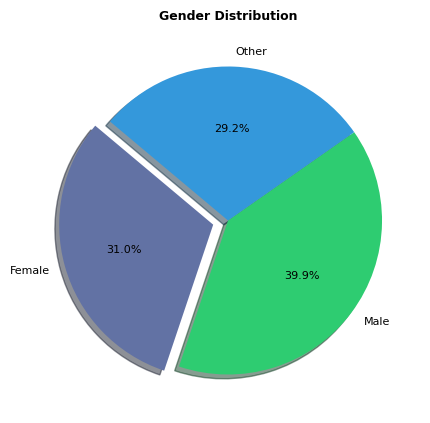

'/mnt/data/Gender_Distribution_Pie_Chart.png'

In [22]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Female', 'Male', 'Other']
sizes = [52, 67, 49]  # Data values for the distribution
colors = ['#6272a4', '#2ecc71', '#3498db']  # Custom color choices
explode = (0.1, 0, 0)  # Highlight the first slice (Female)

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, textprops={'fontsize': 8})

# Title for the chart
plt.title('Gender Distribution', fontsize=9,weight="bold")

# Save the figure
output_path = "/mnt/data/Gender_Distribution_Pie_Chart.png"
plt.show()

output_path


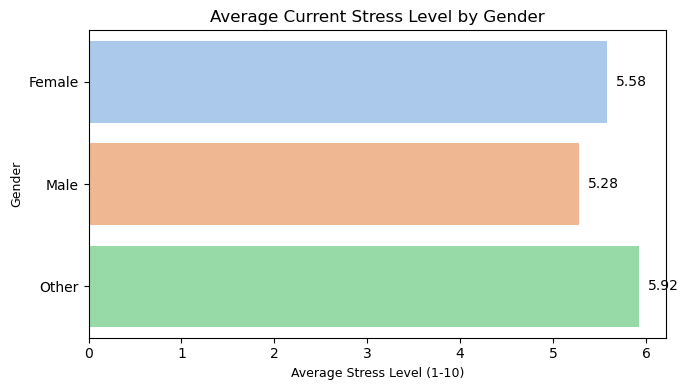

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the chart
data = {
    'Gender': ['Female', 'Male', 'Other'],
    'Average Stress Level': [5.58, 5.28, 5.92]
}

# Plot configuration
plt.figure(figsize=(7, 4))
sns.barplot(
    x=data['Average Stress Level'],
    y=data['Gender'],
    palette="pastel"
)

# Adding values on bars
for index, value in enumerate(data['Average Stress Level']):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center')

# Titles and labels
plt.title("Average Current Stress Level by Gender", fontsize=12)
plt.xlabel("Average Stress Level (1-10)", fontsize=9)
plt.ylabel("Gender", fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


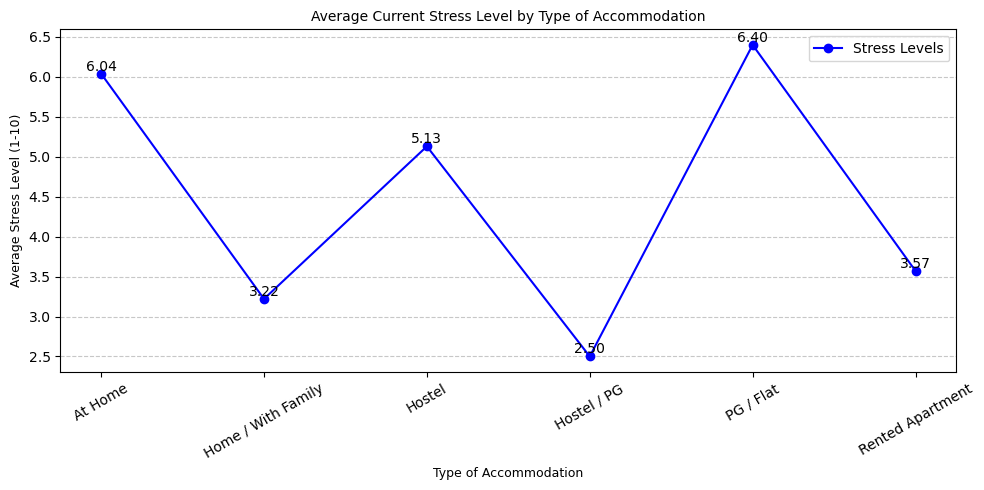

In [17]:
import matplotlib.pyplot as plt

# Data
accommodation_types = ['At Home', 'Home / With Family', 'Hostel', 'Hostel / PG', 'PG / Flat', 'Rented Apartment']
stress_levels = [6.04, 3.22, 5.13, 2.50, 6.40, 3.57]

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(accommodation_types, stress_levels, marker='o', linestyle='-', color='blue', label='Stress Levels')

# Adding data labels
for i, stress in enumerate(stress_levels):
    plt.text(i, stress, f"{stress:.2f}", ha='center', va='bottom')

# Title and labels
plt.title('Average Current Stress Level by Type of Accommodation', fontsize=10)
plt.xlabel('Type of Accommodation', fontsize=9)
plt.ylabel('Average Stress Level (1-10)', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30, fontsize=10)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
